In [1]:
import numpy as np
import matplotlib.pyplot as plt
import Library as lb
from filterpy.common import Q_discrete_white_noise
import tensorflow as tf
from tensorflow import keras

In [5]:
print(tf.__version__)

2.11.0


Prey - Predator clasic

Advancing: 100%


Text(0.5, 0, 'Prey [-]')

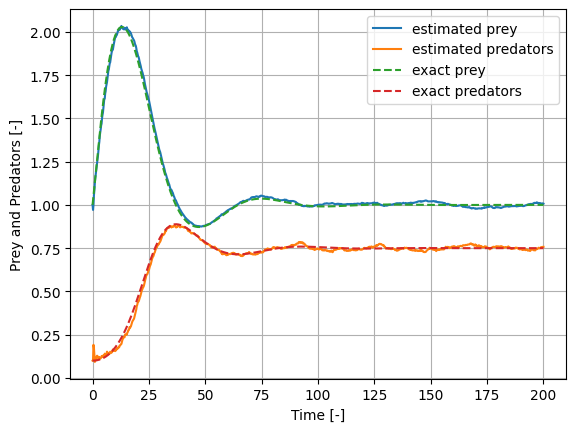

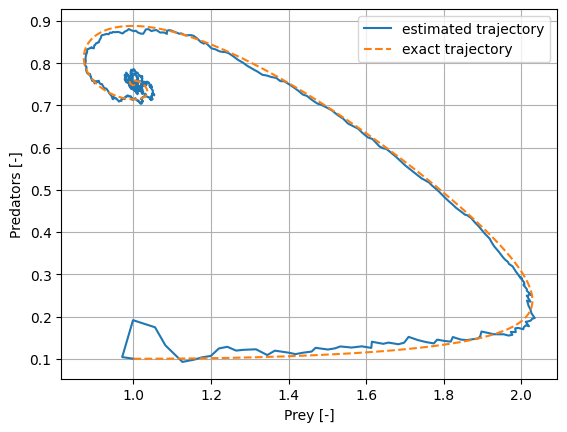

In [169]:
T = 200
Nt = 1000
dt = T/Nt
x0 = 1
y0 = 0.1
rho = 0.1
alpha = 0.25
beta = 0.2
gamma = 0.1
delta = 0.1

# Define the measurament function
def hx(x):
   return np.array([x[0], x[1]])

# Define the transition function
def fx(x, dt):
    F = np.array([[1 + alpha*dt - beta*dt*x[1] -rho*dt*x[0],                             0],
                  [0,                                           1-gamma*dt + delta*dt*x[0]]])
    return np.dot(F, x)

# Define the covariance matrix
P = np.eye(2)
# Define the measurament noise
R = np.eye(2)
# Define the process noise
Q = Q_discrete_white_noise(dim=2, dt=dt, var=.01)

# Exact solution
x_ex = np.zeros((Nt+1,2))
tt=np.arange(0,T+dt,dt)
for i,t in enumerate(tt):
    if i==0:
        x_ex[i,:] = np.array([x0,y0])
    else:
        x_ex[i,0] = x_ex[i-1,0] + dt*x_ex[i-1,0]*(alpha-beta*x_ex[i-1,1]-rho*x_ex[i-1,0])
        x_ex[i,1] = x_ex[i-1,1] + dt*x_ex[i-1,1]*(-gamma+delta*x_ex[i-1,0])

# Define the data acquisition function
def get_sensor_reading(t):
    i = np.int32(t/dt)
    return x_ex[i,:]

# Create the model from library
f = lb.EnKF(dim_x=2, dim_z=2, f=fx, h=hx, get_data=get_sensor_reading, dt=dt, t0=0)
f.create_model(x0=np.array([x0, y0]), P=P, R=R, Q=Q, N=100)

# Predict/Update loop
x_hat = f.loop(T)

plt.figure()
plt.grid(True)
plt.plot(tt,x_hat[:,0], label='estimated prey')
plt.plot(tt,x_hat[:,1], label='estimated predators')
plt.plot(tt,x_ex[:,0], label='exact prey', linestyle='--')
plt.plot(tt,x_ex[:,1], label='exact predators', linestyle='--')
plt.legend()
plt.ylabel('Prey and Predators [-]')
plt.xlabel('Time [-]')

plt.figure()
plt.grid(True)
plt.plot(x_hat[:,0],x_hat[:,1], label='estimated trajectory')
plt.plot(x_ex[:,0],x_ex[:,1], label='exact trajectory', linestyle='--')
plt.legend()
plt.ylabel('Predators [-]')
plt.xlabel('Prey [-]')

Esempio con Stato parametro

In [3]:
T = 200
Nt = 1000
dt = T/Nt
x0 = 1
y0 = 0.1
rho = 0.1
alpha = 0.25
beta = 0.2
gamma = 0.1
delta = 0.1

# Define the measurament function
def hx(x):
   return np.array([x[0], x[1]])

# Define the transition function
def fx(x, dt):
    F = np.array([[1 + x[2]*dt - beta*dt*x[1] -rho*dt*x[0],                             0,                  0],
                  [0,                                           1-gamma*dt + delta*dt*x[0],                 0],
                  [0,                                                                   0,                  1]])
    return np.dot(F, x)

# Assign the initial x array
x = np.array([x0, y0, 0.25])

# Define the covariance matrix
P = np.eye(3)
# Define the measurament noise
R = np.eye(2)
# Define the process noise
Q = Q_discrete_white_noise(dim=3, dt=dt, var=.00)

# Exact solution
x_ex = np.zeros((Nt+1,2))
tt=np.arange(0,T+dt,dt)
for i,t in enumerate(tt):
    if i==0:
        x_ex[i,:] = np.array([x0,y0])
    else:
        x_ex[i,0] = x_ex[i-1,0] + dt*x_ex[i-1,0]*(alpha-beta*x_ex[i-1,1]-rho*x_ex[i-1,0])
        x_ex[i,1] = x_ex[i-1,1] + dt*x_ex[i-1,1]*(-gamma+delta*x_ex[i-1,0])

# Define the data acquisition function
def get_sensor_reading(t):
    i = np.int32(t/dt)
    return x_ex[i,:]

# Create the model from library
f = lb.EnKF(dim_x=3, dim_z=2, f=fx, h=hx, get_data=get_sensor_reading, dt=dt, t0=0)
f.create_model(x0=x, P=P, R=R, Q=Q, N=500)

# Predict/Update loop
x_hat = f.loop(T)

plt.figure()
plt.grid(True)
plt.plot(tt,x_hat[:,0], label='estimated prey')
plt.plot(tt,x_hat[:,1], label='estimated predators')
plt.plot(tt,x_ex[:,0], label='exact prey', linestyle='--')
plt.plot(tt,x_ex[:,1], label='exact predators', linestyle='--')
plt.legend()
plt.ylabel('Prey and Predators [-]')
plt.xlabel('Time [-]')

plt.figure()
plt.grid(True)
plt.plot(x_hat[:,0],x_hat[:,1], label='estimated trajectory')
plt.plot(x_ex[:,0],x_ex[:,1], label='exact trajectory', linestyle='--')
plt.legend()
plt.ylabel('Predators [-]')
plt.xlabel('Prey [-]')

plt.figure()
plt.grid(True)
plt.plot(tt,x_hat[:,2], label='estimated alpha')
plt.axhline(alpha, xmin=0, xmax=tt[-1], label='exact alpha', linestyle='--')
plt.legend()
plt.ylabel('Alpha coefficient [-]')
plt.xlabel('Time [-]')

KeyboardInterrupt: 

Esempio con NN su Prey Predator

In [ ]:
# Surrogate model

T = 200
Nt = 200
dt = T/Nt
x0 = 1
y0 = 0.1
rho = 0.1
alpha = 0.25
beta = 0.2
gamma = 0.1
delta = 0.1

# Define the measurament function
def hx(x):
   return np.array([x[0], x[1]])

# Define the transition function
NN=keras.models.load_model('../data/Prey_Predator/model_NN.h5', compile=False)
def fxx(x, dt):
    x_ = np.empty((1,2,))
    x_[0,:] = x
    return NN(x_)

# Assign the initial x array
x = np.array([x0, y0])

# Define the covariance matrix
P = np.eye(2)
# Define the measurament noise
R = np.eye(2)
# Define the process noise
Q = Q_discrete_white_noise(dim=2, dt=dt, var=.01)

# Exact solution
x_ex = np.zeros((Nt+1,2))
tt=np.arange(0,T+dt,dt)
for i,t in enumerate(tt):
    if i==0:
        x_ex[i,:] = np.array([x0,y0])
    else:
        x_ex[i,0] = x_ex[i-1,0] + dt*x_ex[i-1,0]*(alpha-beta*x_ex[i-1,1]-rho*x_ex[i-1,0])
        x_ex[i,1] = x_ex[i-1,1] + dt*x_ex[i-1,1]*(-gamma+delta*x_ex[i-1,0])

# Define the data acquisition function
def get_sensor_reading(t):
    i = np.int32(t/dt)
    return x_ex[i,:]

# Create the model from library
f = lb.EnKF(dim_x=2, dim_z=2, f=fxx, h=hx, get_data=get_sensor_reading, dt=dt, t0=0)
f.create_model(x0=np.array([x0, y0]), P=P, R=R, Q=Q, N=100)

# Predict/Update loop
x_hat = f.loop(T, verbose=True)

plt.figure()
plt.grid(True)
plt.plot(tt,x_hat[:,0], label='estimated prey')
plt.plot(tt,x_hat[:,1], label='estimated predators')
plt.plot(tt,x_ex[:,0], label='exact prey', linestyle='--')
plt.plot(tt,x_ex[:,1], label='exact predators', linestyle='--')
plt.legend()
plt.ylabel('Prey and Predators [-]')
plt.xlabel('Time [-]')

plt.figure()
plt.grid(True)
plt.plot(x_hat[:,0],x_hat[:,1], label='estimated trajectory')
plt.plot(x_ex[:,0],x_ex[:,1], label='exact trajectory', linestyle='--')
plt.legend()
plt.ylabel('Predators [-]')
plt.xlabel('Prey [-]')

Prova Burgers con FNO in EnKF

In [133]:
folder = 'Burgers_time'

Nx = 2**6
Nt = 2**18
dx = 1/Nx
dz = 4*dx
dt = 1/Nt
xx = np.arange(0,1+dx,dx)
zz = np.arange(0,1+dz,dz)
tt = np.arange(0,0.5+dt,dt)
nu = 0.025
u0 = np.load('../Data/'+ folder +'/u0.npy')
resolution = Nt/64

def compute_ex_sol(xx, tt, u0, nu, resolution):
    u=[]
    uh = np.zeros((xx.shape[0],tt.shape[0]+1))
    uh[:,0] = u0
    for j in range(0, tt.shape[0]):
        for i in range(1, xx.shape[0]-1):
            uh[i,j+1] = uh[i,j] + nu*dt*(uh[i+1,j] - 2*uh[i,j] + uh[i-1,j])/(dx**2) - 0.5*dt*(uh[i,j]**2-uh[i-1,j]**2)/dx
        if j==0:
            u.append(u0)
        elif np.mod(j,resolution)==0:
            u.append(uh[:,j])
    return np.array(u)

# Exact solution
u_ex = compute_ex_sol(xx,tt,u0,nu,resolution)

In [135]:
T = 0.5
Nt = 32
dt = T/Nt
dim = Nx+1

# Define the measurament function
def hx(x):
   return x

# Define the transition function
FNO=keras.models.load_model('../data/' + folder +'/Burgers_time_FNO.h5', compile=False)
def fxx(u, dt):
    factor = np.amax(np.abs(u))
    return factor*(FNO(np.array([u,]))[0])

fft_shape set: 17
ifft_shape set: 32
Bias layer has shape: 32
fft_shape set: 17
ifft_shape set: 32
Bias layer has shape: 32
fft_shape set: 17
ifft_shape set: 32
Bias layer has shape: 32


In [136]:
# Define the covariance matrix
P = np.cov(u_ex, rowvar=False)
# Define the measurament noise
R = 0.1*np.eye(dim)
# Define the process noise
Q = 0.1*np.eye(dim)

# Define the data acquisition function
def get_sensor_reading(t):
    i = np.int32(t/dt)
    return u_ex[i,:]

# Create the model from library
f = lb.EnKF(dim_x=dim, dim_z=dim, f=fxx, h=hx, get_data=get_sensor_reading, dt=dt, t0=0)
f.create_model(x0=u0, P=P, R=R, Q=Q, N=10000)

# Predict/Update loop
u_hat = f.loop(T, verbose=True)



Advancing: 100%


In [ ]:
plt.figure()
for t_index in range(0,tt.shape[0]):
    plt.title('Solution at time: '+str(t_index*dt))
    plt.grid(True)
    plt.plot(u_hat[t_index,:], label='estimated solution')
    plt.plot(u_ex[t_index,:], label='exact solution', linestyle='--')
    plt.xlabel('x [-]')
    plt.ylabel('u [-]')
    plt.ylim([-1,1])
    plt.legend(loc='upper right')
    plt.savefig('../Burgers_time_EnKF_' + str(t_index) + '.png', dpi=300)
    plt.clf()

Prova Burgers con FNO e stato parametro

In [31]:
folder = 'Burgers_time_cx'

Nx = 2**6
Nt = 2**18
dx = 1/Nx
dz = 4*dx
dt = 1/Nt
xx = np.arange(0,1+dx,dx)
zz = np.arange(0,1+dz,dz)
tt = np.arange(0,0.5+dt,dt)
nu = 0.025
u0 = np.load('../Data/Burgers_time/u0.npy')
resolution = Nt/64

def compute_ex_sol(xx, tt, u0, nu, resolution):
    u=[]
    uh = np.zeros((xx.shape[0],tt.shape[0]+1))
    uh[:,0] = u0
    for j in range(0, tt.shape[0]):
        cx = 1.2*np.ones_like(u0)
        for i in range(1, xx.shape[0]-1):
            uh[i,j+1] = uh[i,j] + nu*dt*(uh[i+1,j] - 2*uh[i,j] + uh[i-1,j])/(dx**2) - 0.5*cx[i-1]*dt*(uh[i,j]**2-uh[i-1,j]**2)/dx
        if j==0:
            u.append(np.concatenate((u0,cx), axis=None))
        elif np.mod(j,resolution)==0:
            u.append(np.concatenate((uh[:,j],cx), axis=None))
    return np.array(u)

# Exact solution
u_ex = compute_ex_sol(xx,tt,u0,nu,resolution)
x0 = np.concatenate((u0, 0.95*1.2*np.ones_like(u0)), axis=None)

In [32]:
T = 0.5
Nt = 32
dt = T/Nt
dim = 2*(Nx+1)

# Define the measurament function
def hx(x):
   return x

# Define the transition function
FNO=keras.models.load_model('../data/' + folder +'/Burgers_time_cx_FNO.h5', compile=False)
def fxx(u, dt):
    d = int(dim/2)
    factor = np.amax(np.abs(u[:d]))
    return np.concatenate((factor*(FNO(np.array([[u[:d], u[d:]],]))[0]),u[d:]), axis=None)

fft_shape set: 12
ifft_shape set: 22
Bias layer has shape: 22
fft_shape set: 12
ifft_shape set: 22
Bias layer has shape: 22
fft_shape set: 12
ifft_shape set: 22
Bias layer has shape: 22


In [35]:
# Define the covariance matrix
P = np.cov(u_ex, rowvar=False)
# Define the measurament noise
R = 0.1*np.eye(dim)
# Define the process noise
Q = 0.1*np.eye(dim)

# Define the data acquisition function
def get_sensor_reading(t):
    i = np.int32(t/dt)
    return u_ex[i,:]

# Create the model from library
f = lb.EnKF(dim_x=dim, dim_z=dim, f=fxx, h=hx, get_data=get_sensor_reading, dt=dt, t0=0)
f.create_model(x0=x0, P=P, R=R, Q=Q, N=10000)

# Predict/Update loop
u_hat = f.loop(T, verbose=True)



Advancing: 100%


In [40]:
d = int(dim/2)
plt.figure()
for t_index in range(0,u_ex.shape[0]):    
    plt.title('Solution at time: '+str(t_index*dt))
    plt.grid(True)
    plt.plot(u_hat[t_index,:d], label='estimated solution')
    plt.plot(u_ex[t_index,:d], label='exact solution', linestyle='--')
    plt.plot(u_hat[t_index,d:], label='estimated parameter')
    plt.plot(u_ex[t_index,d:], label='exact parameter', linestyle='--')
    plt.xlabel('x [-]')
    plt.ylabel('u [-]')
    plt.ylim([-1,1.5])
    plt.legend(loc='lower left')
    plt.savefig('../Burgers_time_cx_EnKF_' + str(t_index) + '.png', dpi=300)
    plt.clf()

<Figure size 640x480 with 0 Axes>